# Casa de los Azulejos
# House of tiles

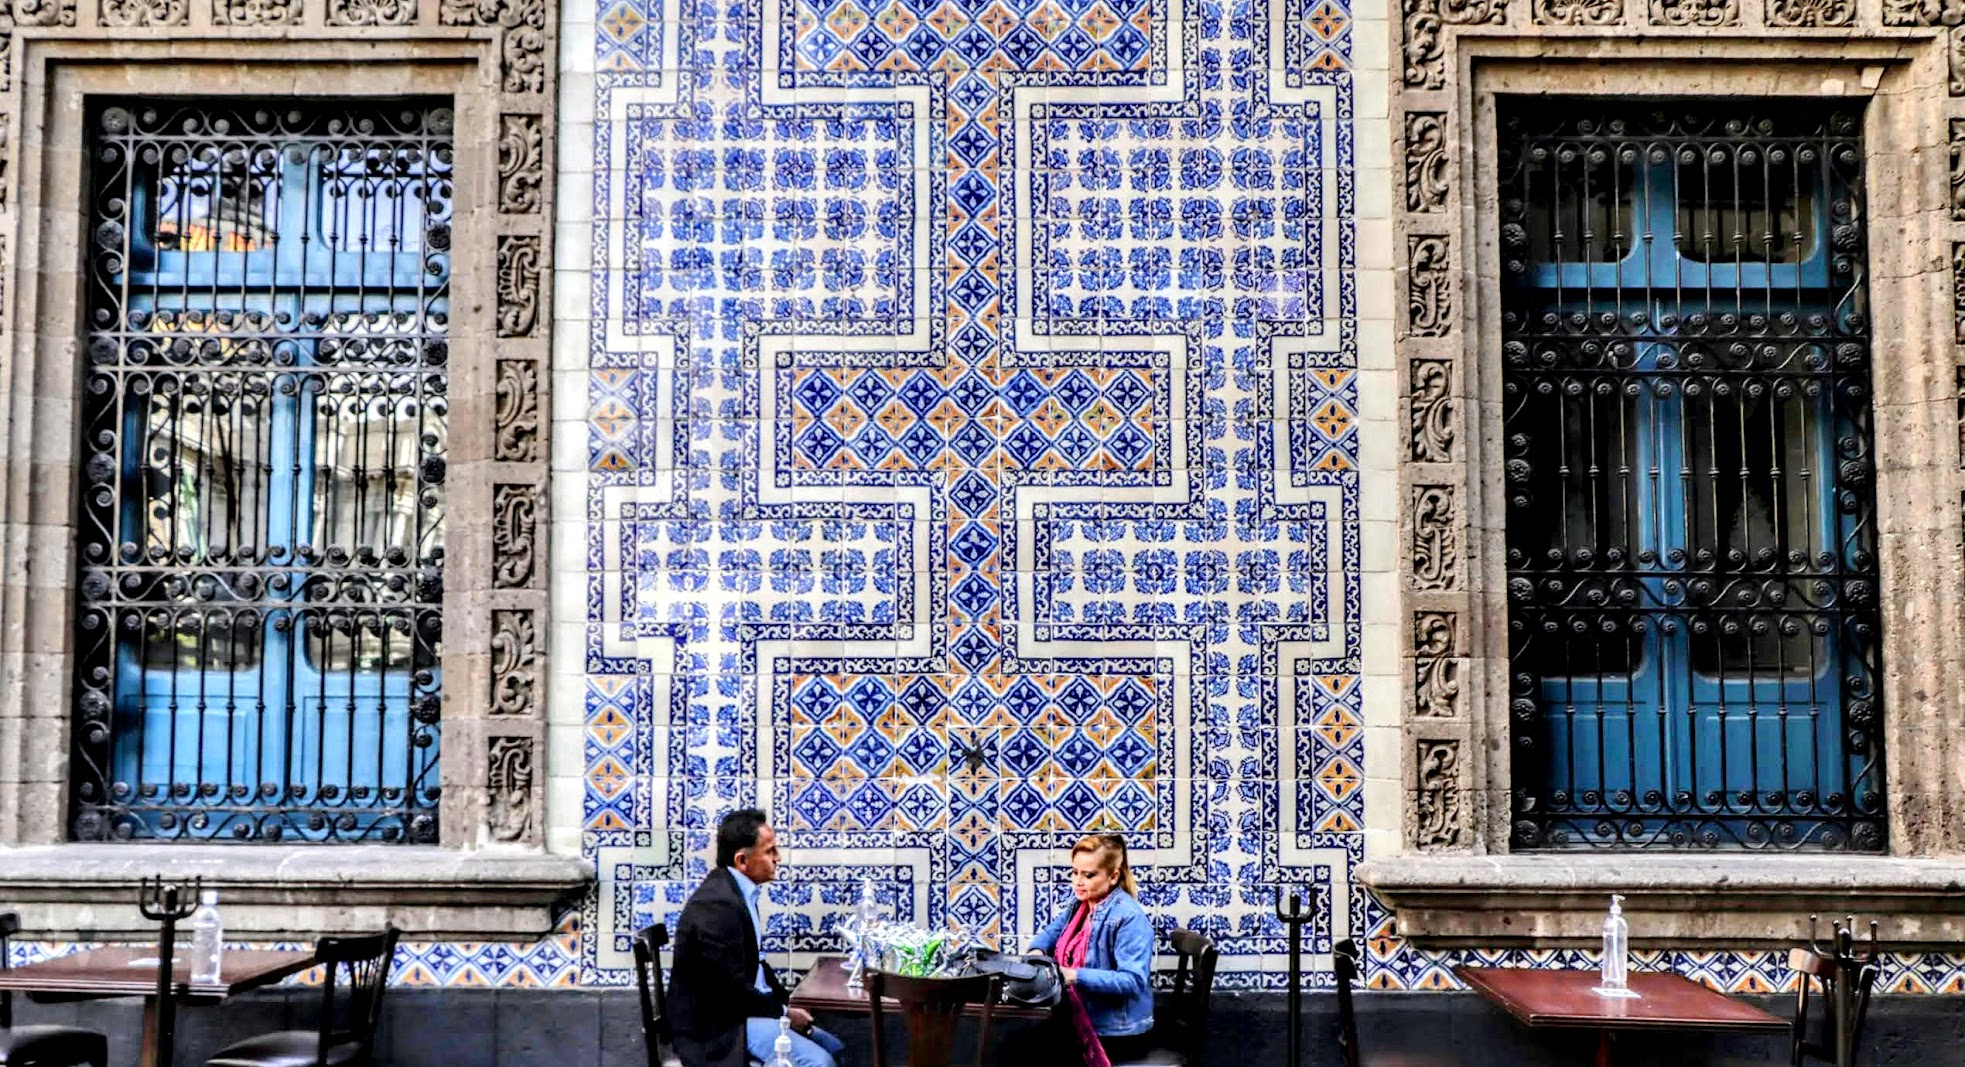

# Introduction
The Casa de los Azulejos in Mexico City is a historical landmark, famous for its magnificent tiled facade. According to legend, a child's father told him: "Hijo, tu nunca irás lejos, ni harás casa de azulejos" (Son, you will never go far, nor will you make a house of tiles). The son proved him wrong by covering his home in exquisite blue and white Talavera tiles. This tale reflects the deep history of azulejos (tin-glazed ceramic tiles, from the Arabic [az-zulayj](https://en.wiktionary.org/wiki/azulejo) الزليج, "polished stone") in Mexico. The Azulejo techniques arrived in Spain from North Africa with the expansion of Islamic rule and then to the Americas, where it blended with Indigenous ceramic art.

The intricate geometric patterns on Talavera tiles have a rich history. In this lesson, we'll recreate some of these beautiful, complex designs by exploring the mathematics behind them. We'll use a space-filling curve called the Hilbert curve to create a tiling pattern that you can then use to design your own "casa de azulejos."

---
# Introducción
La Casa de los Azulejos en la Ciudad de México es un monumento histórico, famoso por su magnífica fachada de azulejos. Según la leyenda, un padre le dijo a su hijo: "Hijo, tú nunca irás lejos, ni harás casa de azulejos". El hijo le demostró que estaba equivocado cubriendo su casa con exquisitos azulejos de Talavera azules y blancos. Esta historia refleja la profunda historia de los azulejos (baldosas de cerámica vidriada con estaño, del árabe al-zulayj الزليج, "piedra pulida") en México. Las técnicas de azulejo llegaron a España desde el norte de África con la expansión del dominio islámico y luego a las Américas, donde se mezclaron con el arte cerámico indígena.

Los intrincados patrones geométricos en los azulejos de Talavera tienen una rica historia. En esta lección, recrearemos algunos de estos hermosos y complejos diseños explorando las matemáticas detrás de ellos. Usaremos una curva que llena el espacio llamada curva de Hilbert para crear un patrón de azulejos que luego podrás usar para diseñar tu propia "casa de azulejos".

## **Lesson 1: Space Filling and the Hilbert Curve**
## **Lección 1: Curvas que Llenan el Espacio y la Curva de Hilbert**

A [Hilbert curve](https://en.wikipedia.org/wiki/Hilbert_curve) is a continuous fractal curve that is space-filling, meaning it can pass through every single point in a square grid. It's built in an iterative way, starting with a simple U-shape and repeating a set of transformations to create a more complex, self-similar pattern.

Una [curva de Hilbert](https://en.wikipedia.org/wiki/Hilbert_curve) es una curva fractal continua que llena el espacio, lo que significa que puede pasar por cada punto de una cuadrícula cuadrada. Se construye de forma iterativa, comenzando con una simple forma de U y repitiendo un conjunto de transformaciones para crear un patrón más complejo y auto-similar.

---
### **Step 1: The Code Explained**
Let's look at the hilbert_curve function. It works recursively, which means the function calls itself until it reaches a base case (order = 0).

Base Case (order = 0): The curve starts as a single point at [0, 0].

Recursive Step: For any order greater than zero, the function takes the path from the previous order and uses four transformations to create the new, larger curve. This is the self-similarity of the fractal.

The four transformations are:

* Top-Left Quadrant: The previous path is rotated and flipped.

* Top-Right Quadrant: The previous path is simply translated (moved) up.

* Bottom-Right Quadrant: The previous path is translated both right and up.

* Bottom-Left Quadrant: The previous path is rotated, flipped, and translated to connect to the rest of the curve.

This process ensures the end of one quadrant's path connects to the start of the next, creating a single continuous line that fills the entire grid.

### **Paso 1: Explicación del Código**
Analicemos la función hilbert_curve. Funciona de manera recursiva, lo que significa que la función se llama a sí misma hasta que alcanza un caso base (orden = 0).

Caso Base (orden = 0): La curva comienza como un único punto en [0, 0].

Paso Recursivo: Para cualquier orden mayor que cero, la función toma la trayectoria del orden anterior y utiliza cuatro transformaciones para crear la nueva curva más grande. Esta es la auto-similitud del fractal.

Las cuatro transformaciones son:

* Cuadrante Superior Izquierdo: La trayectoria anterior se rota y se invierte.

* Cuadrante Superior Derecho: La trayectoria anterior simplemente se traslada (mueve) hacia arriba.

* Cuadrante Inferior Derecho: La trayectoria anterior se traslada tanto a la derecha como hacia arriba.

* Cuadrante Inferior Izquierdo: La trayectoria anterior se rota, se invierte y se traslada para conectarse al resto de la curva.

Este proceso asegura que el final de la trayectoria de un cuadrante se conecte con el inicio del siguiente, creando una única línea continua que llena toda la cuadrícula.

---
### **Step 2: Run the Code**
Copy and paste the code below into a Python environment and run it. The plot_hilbert_curve function will visualize the path we've just created, showing a continuous line weaving through every point on the grid.

### **Paso 2: Ejecutar el Código**
Copia y pega el siguiente código en un entorno de Python y ejecútalo. La función plot_hilbert_curve visualizará la trayectoria que acabamos de crear, mostrando una línea continua que se entrelaza a través de cada punto de la cuadrícula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_curve(order):
    """
    Generates the coordinates for a Hilbert curve of a given order.
    The output is a list of (x, y) tuples.
    """
    if order == 0:
        return np.array([[0, 0]])

    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)

    # 1. Rotate, flip, and translate top-left quadrant
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T

    # 2. Translate top-right quadrant
    q2 = prev_path + np.array([0, scale])

    # 3. Translate bottom-right quadrant
    q3 = prev_path + np.array([scale, scale])

    # 4. Flip, rotate, and translate bottom-left quadrant
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    
    return np.vstack([q1, q2, q3, q4])

def plot_hilbert_curve(order):
    """
    Generates and plots the Hilbert curve in a pixel-based format.
    """
    path = hilbert_curve(order)
    grid_size = 2**order
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the curve as a sequence of points
    ax.plot(path[:, 0], path[:, 1], 'k-', linewidth=2)
    ax.plot(path[:, 0], path[:, 1], 'ko', markersize=4) # Plot points
    
    ax.set_title(f"Hilbert Curve (Order {order})")
    ax.set_aspect('equal')
    ax.set_xlim(-1, grid_size)
    ax.set_ylim(-1, grid_size)
    ax.set_xticks(np.arange(0, grid_size, 1))
    ax.set_yticks(np.arange(0, grid_size, 1))
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.show()

# --- Run the generator and plot the result ---
order = 4
plot_hilbert_curve(order)

---
### **Step 3: Visualizing the Fractal Nature**
The self-similar nature of the Hilbert curve is best seen by generating curves of increasing order. Each step is a scaled and rotated version of the previous one, fitting perfectly into four quadrants of the next iteration. Execute the code below to visualzie orders 1-6.

### **Paso 3: Visualizando la Naturaleza Fractal**
La naturaleza auto-similar de la curva de Hilbert se aprecia mejor generando curvas de orden creciente. Cada paso es una versión escalada y rotada del anterior, encajando perfectamente en cuatro cuadrantes de la siguiente iteración.  Ejecuta el siguiente código para visualizar los órdenes del 1 al 6.

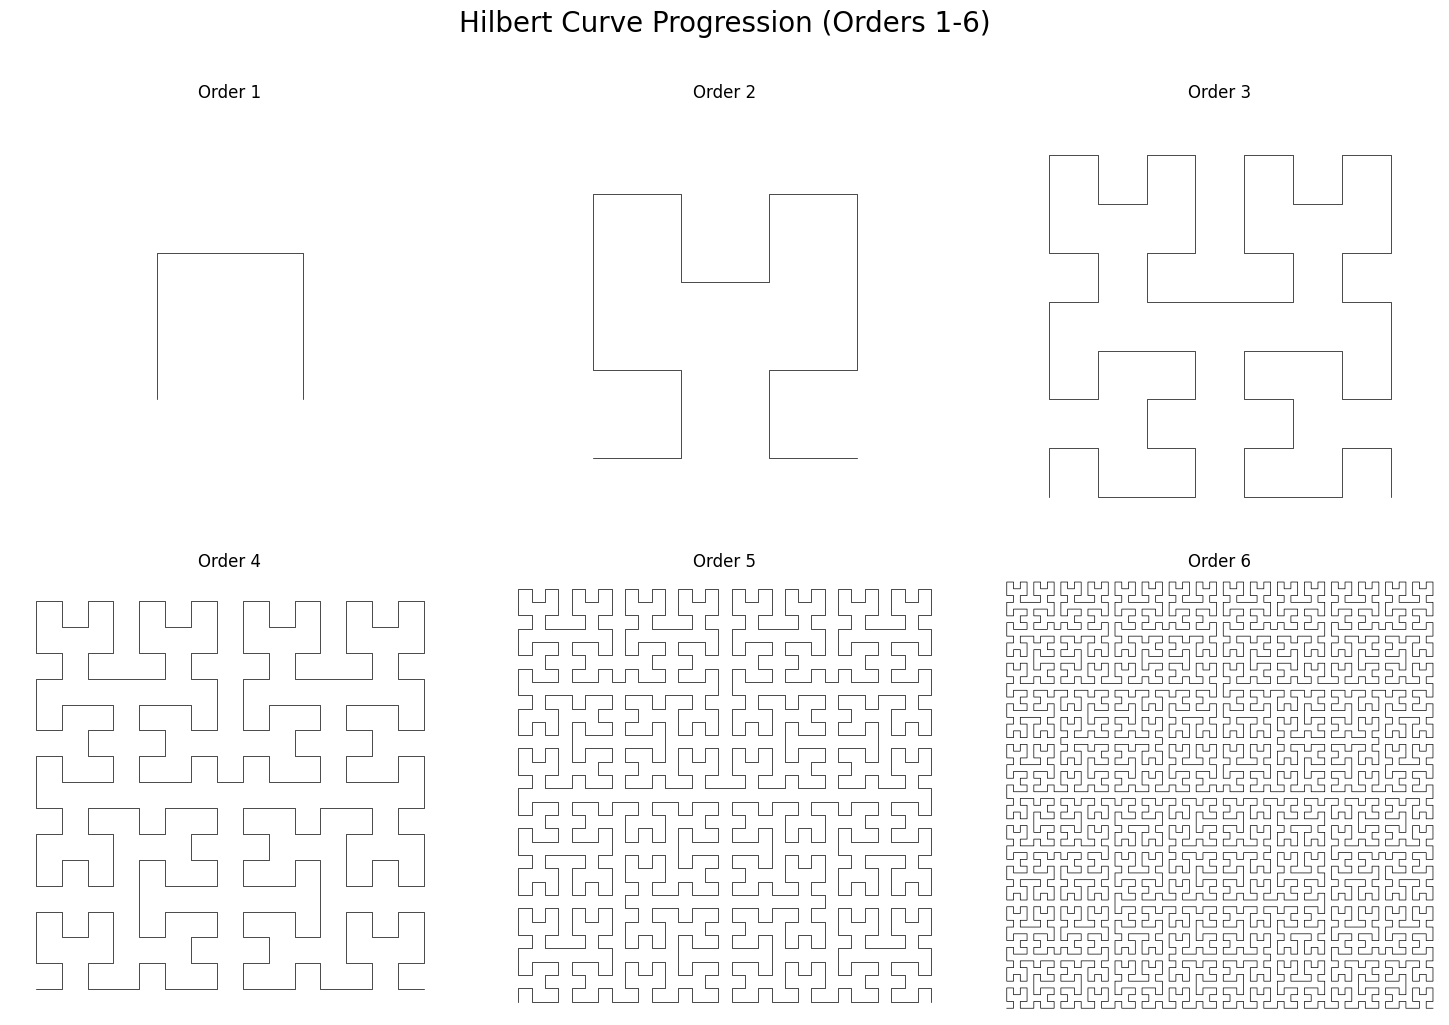

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_curve(order):
    """
    Generates the coordinates for a Hilbert curve of a given order.
    The output is a list of (x, y) tuples.
    """
    if order == 0:
        return np.array([[0, 0]])

    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)

    # 1. Rotate, flip, and translate top-left quadrant
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T

    # 2. Translate top-right quadrant
    q2 = prev_path + np.array([0, scale])

    # 3. Translate bottom-right quadrant
    q3 = prev_path + np.array([scale, scale])

    # 4. Flip, rotate, and translate bottom-left quadrant
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    
    return np.vstack([q1, q2, q3, q4])

def plot_hilbert_curve_grid():
    """
    Generates and plots a 2x3 grid of Hilbert curves from order 1 to 6.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

    for i in range(6):
        order = i + 1
        path = hilbert_curve(order)
        ax = axes[i]
        
        # Plot the curve as a black line
        ax.plot(path[:, 0], path[:, 1], 'k-', linewidth=0.5)
        
        # Set the limits and turn off the axes for a clean look
        grid_size = 2**order
        ax.set_xlim(-1, grid_size)
        ax.set_ylim(-1, grid_size)
        ax.set_aspect('equal', adjustable='box')
        ax.axis('off')  # This turns off all axes, ticks, and labels
        ax.set_title(f"Order {order}", fontsize=12)

    fig.suptitle("Hilbert Curve Progression (Orders 1-6)", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

# --- Run the generator and plot the result ---
plot_hilbert_curve_grid()

## **Lesson 2: The Hilbert Curve as a Tile Pattern**
## **Lección 2: La Curva de Hilbert como Patrón de Azulejos**

Now that we understand how the curve works, let's turn it into a beautiful tile pattern. Instead of a single line, we'll think of the curve as a path that defines the different types of tiles we need to lay down.

Ahora que entendemos cómo funciona la curva, vamos a convertirla en un hermoso patrón de azulejos. En lugar de una sola línea, pensaremos en la curva como un camino que define los diferentes tipos de azulejos que necesitamos colocar.

---
### **Step 1: Assigning Tile Identities**
The generate_tiled_grid function takes our simple Hilbert curve and turns it into a detailed grid of four different tile types. The key idea here is dilation—we're not just drawing a line, we're coloring in the tiles around the line.

* straight_tile: These tiles are on the straight segments of the curve.

* corner_tile: These tiles are at the corners where the curve turns.

* filler_tile: These are the tiles that immediately surround the curve path. They "fill" the space next to the line.

* center_tile: These are the tiles that are far from the curve, in the empty space between the dilated sections.

The code works by first identifying every single point on the path, then looping through those points to find the straight_tile and corner_tile types. Finally, it checks the neighboring tiles to identify the filler_tiles and marks any remaining unassigned tiles as center_tiles.

### **Paso 1: Asignando Identidades a los Azulejos**
La función generate_tiled_grid toma nuestra simple curva de Hilbert y la convierte en una cuadrícula detallada de cuatro tipos de azulejos diferentes. La idea clave aquí es la dilatación: no solo estamos dibujando una línea, sino que estamos coloreando los azulejos alrededor de ella.

* straight_tile (azulejo recto): Estos azulejos se encuentran en los segmentos rectos de la curva.

* corner_tile (azulejo de esquina): Estos azulejos están en las esquinas donde la curva gira.

* filler_tile (azulejo de relleno): Estos son los azulejos que rodean inmediatamente el camino de la curva. "Rellenan" el espacio junto a la línea.

* center_tile (azulejo central): Estos son los azulejos que están lejos de la curva, en el espacio vacío entre las secciones dilatadas.

El código funciona primero identificando cada punto en el camino, luego recorriendo esos puntos para encontrar los tipos straight_tile y corner_tile. Finalmente, verifica los azulejos vecinos para identificar los filler_tile y marca cualquier azulejo no asignado restante como center_tile.

---
### **Step 2: Run the Code**
Copy and paste the code below into a Python environment and run it. The plot_grid function will display the full tiling pattern, showing how the Hilbert curve can be used to generate a complete and intricate design using just four different tile types. This is the pattern you will use to lay out your own Talavera tiles in the next step.

### **Paso 2: Ejecutar el Código**
Copia y pega el código a continuación en un entorno de Python y ejecútalo. La función plot_grid mostrará el patrón de azulejos completo, demostrando cómo la curva de Hilbert puede usarse para generar un diseño completo e intrincado usando solo cuatro tipos de azulejos diferentes. Este es el patrón que usarás para colocar tus propios azulejos de Talavera en el siguiente paso.

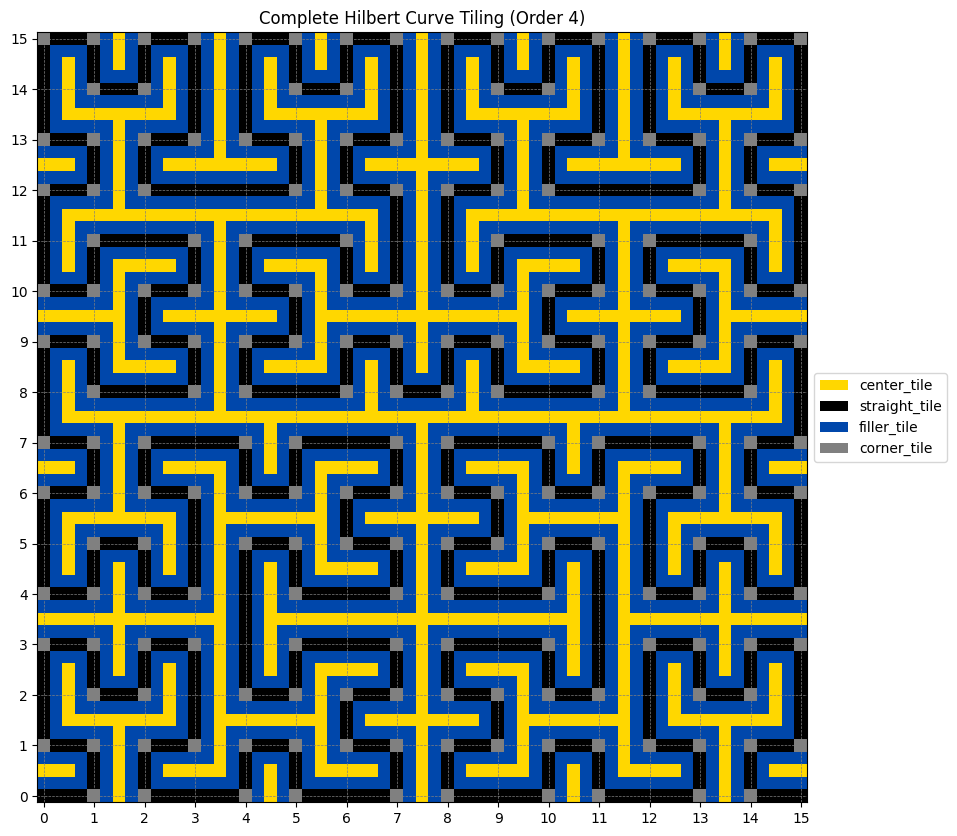

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def hilbert_curve(order):
    """
    Generates the coordinates for a Hilbert curve of a given order.
    The output is a list of (x, y) tuples.
    """
    if order == 0:
        return np.array([[0, 0]])

    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)
    
    # 1. Rotate, flip, and translate top-left quadrant
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T
    
    # 2. Translate top-right quadrant
    q2 = prev_path + np.array([0, scale])
    
    # 3. Translate bottom-right quadrant
    q3 = prev_path + np.array([scale, scale])
    
    # 4. Flip, rotate, and translate bottom-left quadrant
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    
    return np.vstack([q1, q2, q3, q4])

def generate_tiled_grid(order):
    """
    Generates a grid with a dilated Hilbert curve, distinguishing between
    straight and corner tiles. The grid is divided into 1/4th unit tiles.
    
    Returns:
        np.ndarray: A 2D array where integer values correspond to tile types.
        0: center_tile, 1: straight_tile, 2: filler_tile, 3: corner_tile.
    """
    path = hilbert_curve(order)
    grid_size = 2**order
    
    # Scale factor for our high-resolution grid (1/4th of a unit = 2 pixels)
    scale_factor = 4
    hires_grid_size = grid_size * scale_factor
    grid = np.zeros((hires_grid_size, hires_grid_size), dtype=int)
    
    # A new, more precise path that accounts for the 1/4th unit tiles
    tiled_path = []
    
    # Iterate through the original path to generate the high-res path
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        
        # Determine the direction of the segment
        dx, dy = x2 - x1, y2 - y1
        
        # Walk along the path in 1/4th unit increments
        for j in range(scale_factor):
            px = x1 + (j * dx) / scale_factor
            py = y1 + (j * dy) / scale_factor
            tiled_path.append([px, py])
            
    # Add the final point
    tiled_path.append(path[-1])

    # Classify each tile in the tiled path
    for i, (x, y) in enumerate(tiled_path):
        x_int, y_int = int(x * scale_factor), int(y * scale_factor)
        
        tile_type = 1 # Default to straight_tile
        is_corner = False
        
        if 0 < i < len(tiled_path) - 1:
            prev_x, prev_y = tiled_path[i-1]
            next_x, next_y = tiled_path[i+1]
            
            # Check if the path makes a turn
            if not (prev_x == next_x or prev_y == next_y):
                is_corner = True
                
        if is_corner:
            tile_type = 3
        
        # Mark the line and filler tiles
        # The line tile is a 1x1 pixel block in this scaled grid
        if 0 <= x_int < hires_grid_size and 0 <= y_int < hires_grid_size:
            grid[y_int, x_int] = tile_type
        
        # Mark filler around this tile, ensuring no writes go out of bounds
        for filler_x in range(max(0, x_int - 1), min(hires_grid_size, x_int + 2)):
            for filler_y in range(max(0, y_int - 1), min(hires_grid_size, y_int + 2)):
                if grid[filler_y, filler_x] == 0:
                    grid[filler_y, filler_x] = 2

    return grid

def plot_grid(grid, order):
    """
    Plots the grid to visualize the tiled Hilbert curve.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define colors for each tile type
    colors = ['#FFD700', '#000000', '#0047AB', '#808080'] # center_tile, straight_tile, filler_tile, corner_tile
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors)
    
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.set_title(f"Complete Hilbert Curve Tiling (Order {order})")
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    # --- Overlay the original Cartesian grid ---
    # Infer the size from the grid itself
    plot_size = grid.shape[0]
    grid_size = 2**order
    scale_factor = 4
    
    # Set the major tick locations to align with the original grid
    major_ticks = np.arange(0, plot_size, scale_factor)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # Set the tick labels to correspond to the original units
    ax.set_xticklabels(np.arange(0, grid_size, 1))
    ax.set_yticklabels(np.arange(0, grid_size, 1))
    
    # Add the grid lines
    ax.grid(which='major', color='gray', linestyle='--', linewidth=0.5)

    # Create a legend
    legend_elements = [
        Patch(facecolor=colors[0], label='center_tile'),
        Patch(facecolor=colors[1], label='straight_tile'),
        Patch(facecolor=colors[2], label='filler_tile'),
        Patch(facecolor=colors[3], label='corner_tile'),
    ]
    # Moving the legend outside the plot
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

# --- Run the generator and plot the result ---
order = 4
tiled_grid = generate_tiled_grid(order)
tiled_grid = tiled_grid[:-3,:-3]
plot_grid(tiled_grid, order)

---
### **Step 3: Visualizing the Fractal Nature**
The self-similar nature of the Hilbert curve is best seen by generating curves of increasing order. Each step is a scaled and rotated version of the previous one, fitting perfectly into four quadrants of the next iteration. Execute the code below to visualzie orders 1-6.

### **Paso 3: Visualizando la Naturaleza Fractal**
La naturaleza auto-similar de la curva de Hilbert se aprecia mejor generando curvas de orden creciente. Cada paso es una versión escalada y rotada del anterior, encajando perfectamente en cuatro cuadrantes de la siguiente iteración.  Ejecuta el siguiente código para visualizar los órdenes del 1 al 6.

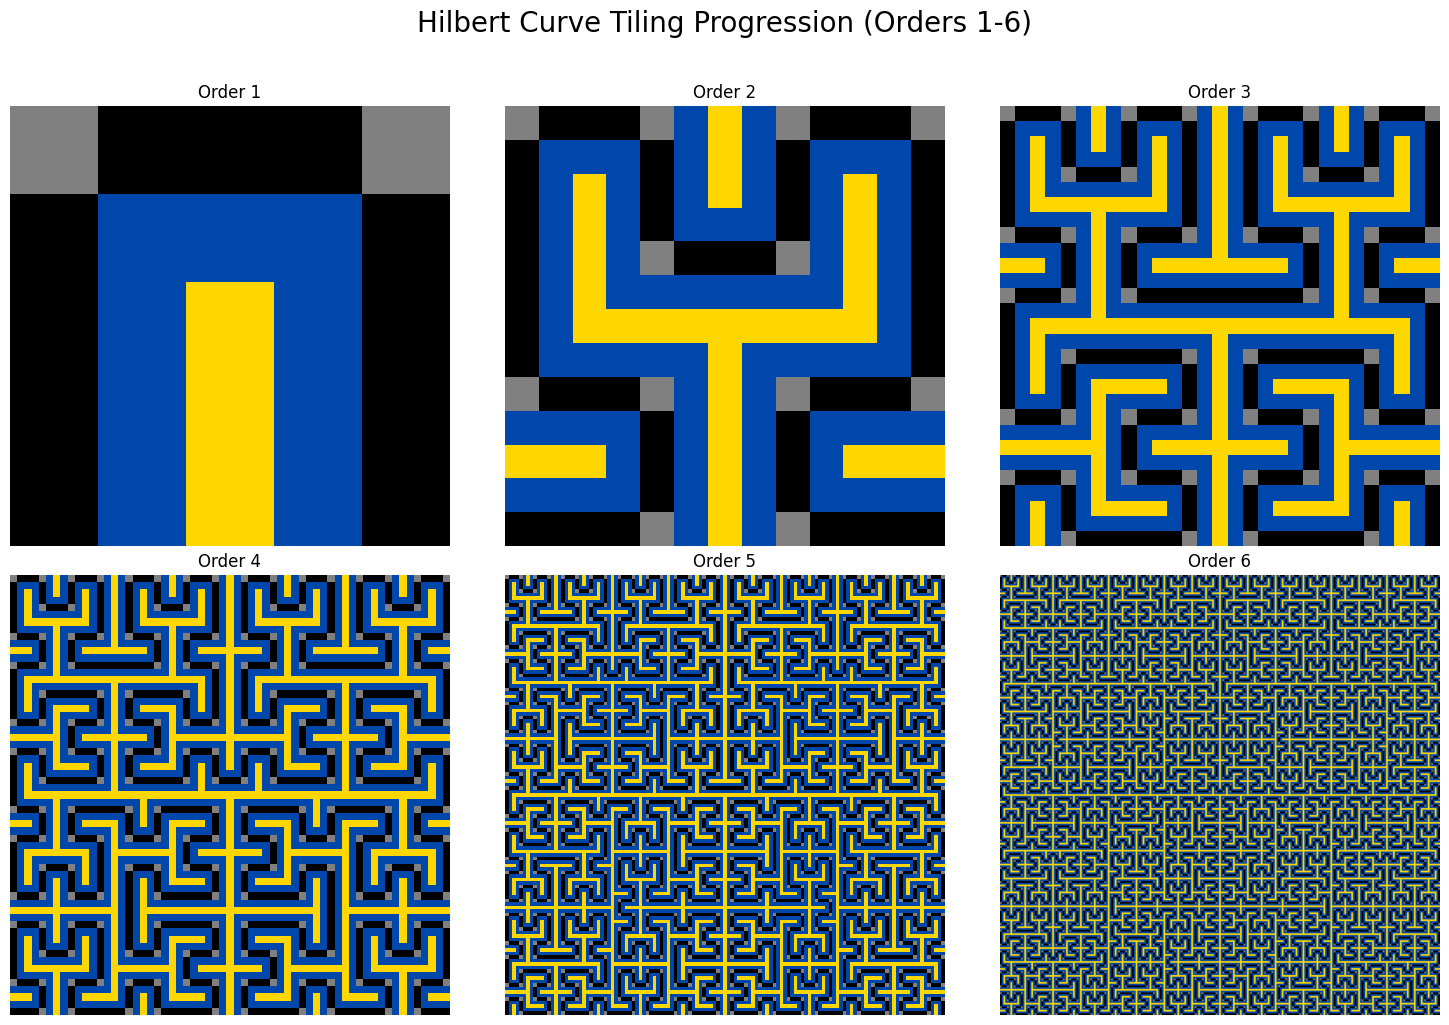

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def hilbert_curve(order):
    """
    Generates the coordinates for a Hilbert curve of a given order.
    The output is a list of (x, y) tuples.
    """
    if order == 0:
        return np.array([[0, 0]])

    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)
    
    # 1. Rotate, flip, and translate top-left quadrant
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T
    
    # 2. Translate top-right quadrant
    q2 = prev_path + np.array([0, scale])
    
    # 3. Translate bottom-right quadrant
    q3 = prev_path + np.array([scale, scale])
    
    # 4. Flip, rotate, and translate bottom-left quadrant
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    
    return np.vstack([q1, q2, q3, q4])

def generate_tiled_grid(order):
    """
    Generates a grid with a dilated Hilbert curve, distinguishing between
    straight and corner tiles. The grid is divided into 1/4th unit tiles.
    
    Returns:
        np.ndarray: A 2D array where integer values correspond to tile types.
        0: center_tile, 1: straight_tile, 2: filler_tile, 3: corner_tile.
    """
    path = hilbert_curve(order)
    grid_size = 2**order
    
    # Scale factor for our high-resolution grid (1/4th of a unit = 2 pixels)
    scale_factor = 4
    hires_grid_size = grid_size * scale_factor
    grid = np.zeros((hires_grid_size, hires_grid_size), dtype=int)
    
    # A new, more precise path that accounts for the 1/4th unit tiles
    tiled_path = []
    
    # Iterate through the original path to generate the high-res path
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        
        # Determine the direction of the segment
        dx, dy = x2 - x1, y2 - y1
        
        # Walk along the path in 1/4th unit increments
        for j in range(scale_factor):
            px = x1 + (j * dx) / scale_factor
            py = y1 + (j * dy) / scale_factor
            tiled_path.append([px, py])
            
    # Add the final point
    tiled_path.append(path[-1])

    # Classify each tile in the tiled path
    for i, (x, y) in enumerate(tiled_path):
        x_int, y_int = int(x * scale_factor), int(y * scale_factor)
        
        tile_type = 1 # Default to straight_tile
        is_corner = False
        
        if 0 < i < len(tiled_path) - 1:
            prev_x, prev_y = tiled_path[i-1]
            next_x, next_y = tiled_path[i+1]
            
            # Check if the path makes a turn
            if not (prev_x == next_x or prev_y == next_y):
                is_corner = True
                
        if is_corner:
            tile_type = 3
        
        # Mark the line and filler tiles
        # The line tile is a 1x1 pixel block in this scaled grid
        if 0 <= x_int < hires_grid_size and 0 <= y_int < hires_grid_size:
            grid[y_int, x_int] = tile_type
        
        # Mark filler around this tile, ensuring no writes go out of bounds
        for filler_x in range(max(0, x_int - 1), min(hires_grid_size, x_int + 2)):
            for filler_y in range(max(0, y_int - 1), min(hires_grid_size, y_int + 2)):
                if grid[filler_y, filler_x] == 0:
                    grid[filler_y, filler_x] = 2

    return grid

def plot_tiled_grid_progression():
    """
    Generates and plots a 2x3 grid of Hilbert curve tilings from order 1 to 6.
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

    # Define colors for each tile type
    colors = ['#FFD700', '#000000', '#0047AB', '#808080']
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors)

    for i in range(6):
        order = i + 1
        tiled_grid = generate_tiled_grid(order)

        # Apply the manual cropping
        tiled_grid = tiled_grid[:-3, :-3]

        ax = axes[i]
        
        ax.imshow(tiled_grid, cmap=cmap, origin='lower')
        ax.set_title(f"Order {order}", fontsize=12)
        ax.set_aspect('equal')
        ax.axis('off')  # Turn off axes for a clean look

    fig.suptitle("Hilbert Curve Tiling Progression (Orders 1-6)", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

# --- Run the generator and plot the result ---
plot_tiled_grid_progression()

## **Lesson 3: Preparing the Tile Assets**
## **Lección 3: Preparando los Activos de Azulejos**
In our previous lessons, we created the mathematical framework for the Hilbert curve. Now, we'll focus on the visual components of our project: the tiles themselves. This lesson covers a crucial first step in any image-based project: asset preparation. We'll write functions to load, resize, and standardize our four tile types.  

En nuestras lecciones anteriores, creamos el marco matemático para la curva de Hilbert. Ahora, nos enfocaremos en los componentes visuales de nuestro proyecto: los azulejos mismos. Esta lección cubre un primer paso crucial en cualquier proyecto basado en imágenes: la preparación de activos. Escribiremos funciones para cargar, redimensionar y estandarizar nuestros cuatro tipos de azulejos.

---
### **Step 1: Loading and Resizing the Tiles**
The first step is to load our tiles from a directory and ensure they are all the same size. Consistency is key, as mixing different tile dimensions will lead to errors when we try to assemble the final image.

The load_and_resize_tiles function performs a two-pass process. The first pass loads all images and determines the smallest width or height among them. The second pass then resizes every image to a square with that minimum dimension, ensuring no data is lost and all tiles are uniform.

### **Paso 1: Cargando y Redimensionando los Azulejos**
El primer paso es cargar nuestros azulejos de un directorio y asegurarnos de que todos tengan el mismo tamaño. La consistencia es clave, ya que mezclar diferentes dimensiones de azulejos provocará errores cuando intentemos ensamblar la imagen final.

La función load_and_resize_tiles realiza un proceso de dos pasadas. La primera pasada carga todas las imágenes y determina la anchura o altura más pequeña entre ellas. La segunda pasada redimensiona cada imagen a un cuadrado con esa dimensión mínima, asegurando que no se pierdan datos y que todos los azulejos sean uniformes.

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_and_resize_tiles(tiles_directory="tiles"):
    """
    Loads tile images from a directory, finds the minimum dimension, and
    resizes all tiles to that size.
    
    Args:
        tiles_directory (str): The path to the folder containing the tile images.
        
    Returns:
        dict: A dictionary of resized Image objects, keyed by tile name.
    """
    tile_names = ["center_tile", "corner_tile", "filler_tile", "straight_tile"]
    loaded_images = {}
    min_dimension = float('inf')

    # Pass 1: Load images and find the minimum dimension
    for name in tile_names:
        file_path = os.path.join(tiles_directory, f"{name}.tif")
        try:
            img = Image.open(file_path)
            loaded_images[name] = img
            
            # Find the smallest dimension across all images
            width, height = img.size
            min_dimension = min(min_dimension, width, height)
            
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found. Please ensure the 'tiles' directory is in the same location as your script.")
            return None
    
    # Pass 2: Resize all images to the minimum dimension
    resized_images = {}
    for name, img in loaded_images.items():
        resized_img = img.resize((min_dimension, min_dimension), Image.Resampling.LANCZOS)
        resized_images[name] = resized_img
        
    print(f"All images loaded and resized to a size of {min_dimension}x{min_dimension} pixels.")
    return resized_images

---
### **Step 2: Standardizing Tile Orientation**
This is one of the most critical steps, as our previous debugging sessions showed. To correctly assemble the Hilbert curve, we need a single, canonical standard orientation for our straight_tile and corner_tile assets. All other rotations can then be derived from these base orientations.

For our project, we'll define the following standards:

* Straight Tile: A horizontal line.

* Corner Tile: A bottom-left corner (└).

The standardize_tiles function takes the initial orientation of your tiles as input and rotates them to match our standard. It's a simple but vital step that prevents the rotation errors we saw earlier.

### **Paso 2: Estandarizando la Orientación de los Azulejos**
Este es uno de los pasos más críticos, como demostraron nuestras sesiones de depuración anteriores. Para ensamblar correctamente la curva de Hilbert, necesitamos una única y canónica orientación estándar para nuestros activos de azulejo_recto y azulejo_esquina. Todas las demás rotaciones se pueden derivar de estas orientaciones base.

Para nuestro proyecto, definiremos los siguientes estándares:

* Azulejo Recto: Una línea horizontal.

* Azulejo Esquina: Una esquina inferior izquierda (└).

La función standardize_tiles toma la orientación inicial de tus azulejos como entrada y los rota para que coincidan con nuestro estándar. Es un paso simple pero vital que previene los errores de rotación que vimos anteriormente.

In [6]:
def standardize_tiles(tile_images, straight_tile_orientation, corner_tile_orientation):
    """
    Rotates the straight and corner tiles to a standardized orientation.
    The standard orientations are:
    - Straight tile: horizontal
    - Corner tile: bottom-left (└)
    
    Args:
        tile_images (dict): A dictionary of PIL Image objects.
        straight_tile_orientation (str): The initial orientation of the straight tile ("horizontal" or "vertical").
        corner_tile_orientation (str): The initial orientation of the corner tile ("bottom-left", "bottom-right", "top-left", or "top-right").
        
    Returns:
        dict: The dictionary with the straight and corner tiles rotated.
    """
    straight_rotations = {
        'vertical': -90,    # From vertical to horizontal
        'horizontal': 0      # Already horizontal, no rotation needed
    }
    
    corner_rotations = {
        'bottom-right': -90,    # From ┘ to └
        'top-left': 90,         # From ┌ to └
        'top-right': 180,       # From ┐ to └
        'bottom-left': 0        # Already bottom-left, no rotation needed
    }
    
    standardized = tile_images.copy()
    
    straight_angle = straight_rotations.get(straight_tile_orientation.lower(), 0)
    standardized['straight_tile'] = standardized['straight_tile'].rotate(straight_angle, expand=False)
    
    corner_angle = corner_rotations.get(corner_tile_orientation.lower(), 0)
    standardized['corner_tile'] = standardized['corner_tile'].rotate(corner_angle, expand=False)
    
    return standardized

---
### **Step 3. Putting It All Together**
We can now run our functions to load, resize, and standardize the tile assets. The plot_tiles function (which you already provided) is a great way to visually confirm that our assets are ready to go. The code below provides a complete example of the full workflow.

### **Paso 3. Uniéndolo Todo**
Ahora podemos ejecutar nuestras funciones para cargar, redimensionar y estandarizar los activos de azulejos. La función plot_tiles (que ya proporcionaste) es una excelente manera de confirmar visualmente que nuestros activos están listos. El código a continuación proporciona un ejemplo completo del flujo de trabajo.

All images loaded and resized to a size of 90x90 pixels.


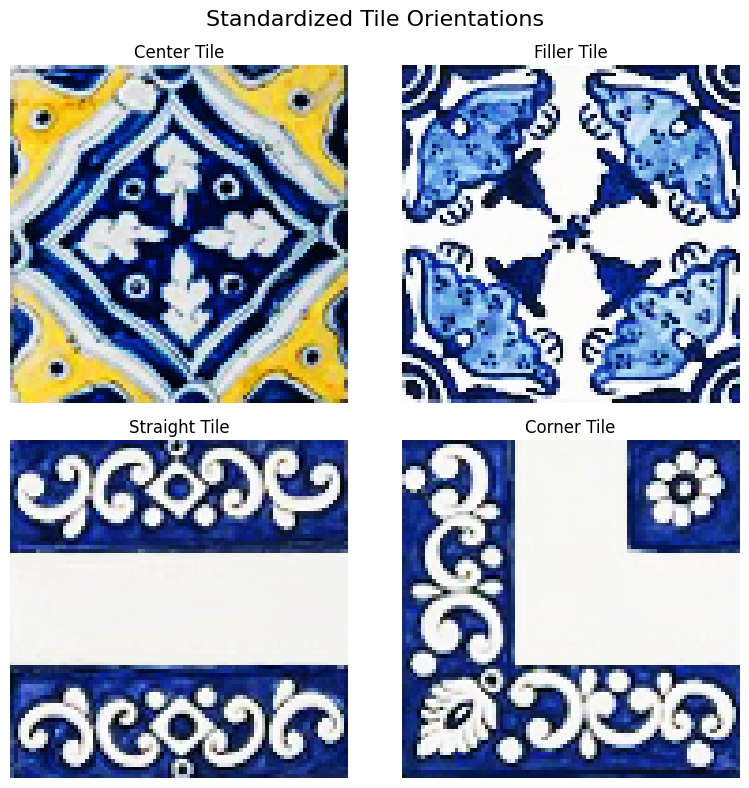

In [7]:
def plot_tiles(tile_images, title="Initial Tile Orientations"):
    """
    Plots the four tile images in a 2x2 subplot grid.
    
    Args:
        tile_images (dict): A dictionary of PIL Image objects.
        title (str): A title for the plot.
    """
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    axes = axes.flatten()
    
    tile_order = ["center_tile", "filler_tile", "straight_tile", "corner_tile"]
    
    for i, name in enumerate(tile_order):
        ax = axes[i]
        img = tile_images[name]
        ax.imshow(img)
        ax.set_title(name.replace('_', ' ').title())
        ax.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# --- Example of running the functions in a Jupyter-friendly way ---

# Step 1: Load and resize the tiles
# Replace 'vertical' and 'bottom-right' with the actual orientations of your tiles
tile_images = load_and_resize_tiles(tiles_directory="tiles")

# Step 2: Plot the initial orientations for visual confirmation
if tile_images:
    plot_tiles(tile_images, title="Initial Tile Orientations")
    
# Step 3: Standardize the tiles based on their initial orientations
# The code below assumes your straight tile is vertical and your corner tile is bottom-right.
if tile_images:
    standardized_tiles = standardize_tiles(tile_images, straight_tile_orientation='vertical', corner_tile_orientation='bottom-right')

# Step 4: Plot the standardized tiles to confirm the rotations worked
if 'standardized_tiles' in locals():
    plot_tiles(standardized_tiles, title="Standardized Tile Orientations")

## **Lesson 4: Building the Casa de Azulejos**
## **Lección 4: Construyendo la Casa de Azulejos**

We have now built all the necessary components for our project: the mathematical representation of the Hilbert curve, the functions to generate a tiled grid, and the tools to prepare our image assets. In this final lesson, we'll connect all these pieces to build the complete, tile-based Hilbert curve.

Ahora hemos construido todos los componentes necesarios para nuestro proyecto: la representación matemática de la curva de Hilbert, las funciones para generar una cuadrícula de azulejos y las herramientas para preparar nuestros activos de imagen. En esta lección final, conectaremos todas estas piezas para construir la curva de Hilbert completa basada en azulejos.

---
### **Step 1: The Complete Workflow**
The process for building our Casa de Azulejos (House of Tiles) follows a logical sequence:

1. Define the Order: Choose the order of the Hilbert curve you want to generate. A higher order means a larger, more intricate curve.

2. Load and Standardize Assets: Use our load_and_resize_tiles function to prepare the four tile images. Then, use standardize_tiles to ensure they are oriented correctly.

3. Generate the Tiled Grid: Use the generate_tiled_grid_with_orientation function to create a grid of numbers. This grid is our blueprint, where each number corresponds to a specific tile and its orientation.

4. Create the Composite Image: Use create_tiled_masterpiece to iterate through the grid, placing the correct rotated tile at each position. This function effectively "draws" the final image.

5. Visualize and Save: Display the final image using matplotlib to appreciate the result. You can then save the image or create a GIF, as we've done in our previous discussions.

### **Paso 1: El Flujo de Trabajo Completo**
El proceso para construir nuestra Casa de Azulejos sigue una secuencia lógica:

1. Definir el Orden: Elige el orden de la curva de Hilbert que deseas generar. Un orden más alto significa una curva más grande y más intrincada.

2. Cargar y Estandarizar Activos: Utiliza nuestra función load_and_resize_tiles para preparar los cuatro azulejos. Luego, usa standardize_tiles para asegurarte de que estén orientados correctamente.

3. Generar la Cuadrícula de Azulejos: Utiliza la función generate_tiled_grid_with_orientation para crear una cuadrícula de números. Esta cuadrícula es nuestro plano, donde cada número corresponde a un azulejo específico y su orientación.

4. Crear la Imagen Compuesta: Usa create_tiled_masterpiece para iterar a través de la cuadrícula, colocando el azulejo rotado correcto en cada posición. Esta función "dibuja" la imagen final de manera efectiva.

5. Visualizar y Guardar: Muestra la imagen final usando matplotlib para apreciar el resultado. Luego, puedes guardar la imagen o crear un GIF, como hemos hecho en nuestras discusiones anteriores.

---
### **Step 2: The Final Code**
The code below consolidates all the functions we've developed into a single, cohesive script. The main execution block (if __name__ == "__main__":) runs the full workflow, generating and displaying a beautiful Hilbert curve tiling of a specified order.

### **Paso 2: El Código Final**
El código a continuación consolida todas las funciones que hemos desarrollado en un solo script cohesivo. El bloque de ejecución principal (if __name__ == "__main__":) ejecuta el flujo de trabajo completo, generando y mostrando un hermoso mosaico de la curva de Hilbert de un orden específico.

All images loaded and resized to 90x90 pixels.


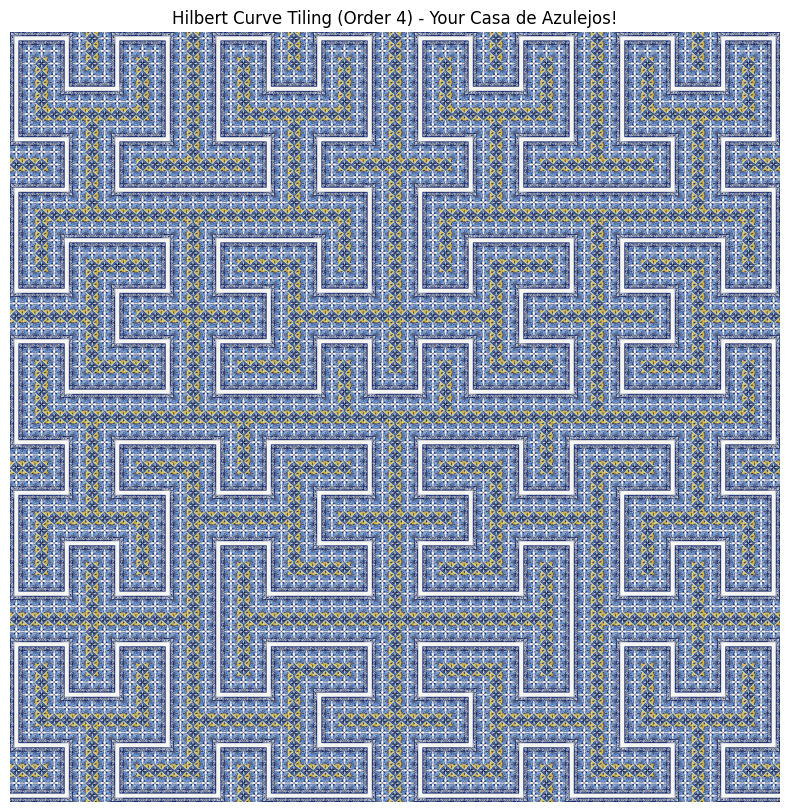

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# --- Mathematical Foundation: The Hilbert Curve ---

def hilbert_curve(order):
    """Generates the coordinates for a Hilbert curve of a given order."""
    if order == 0:
        return np.array([[0, 0]])
    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T
    q2 = prev_path + np.array([0, scale])
    q3 = prev_path + np.array([scale, scale])
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    return np.vstack([q1, q2, q3, q4])

# --- Asset Preparation: Load, Resize, and Standardize Tiles ---

def load_and_resize_tiles(tiles_directory="tiles"):
    """Loads tile images from a directory, resizes all tiles to a uniform size."""
    tile_names = ["center_tile", "corner_tile", "filler_tile", "straight_tile"]
    loaded_images = {}
    min_dimension = float('inf')
    for name in tile_names:
        file_path = os.path.join(tiles_directory, f"{name}.tif")
        try:
            img = Image.open(file_path)
            loaded_images[name] = img
            width, height = img.size
            min_dimension = min(min_dimension, width, height)
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found.")
            return None
    resized_images = {}
    for name, img in loaded_images.items():
        resized_img = img.resize((min_dimension, min_dimension), Image.Resampling.LANCZOS)
        resized_images[name] = resized_img
    print(f"All images loaded and resized to {min_dimension}x{min_dimension} pixels.")
    return resized_images

def standardize_tiles(tile_images, straight_tile_orientation, corner_tile_orientation):
    """Rotates the straight and corner tiles to a standardized orientation."""
    straight_rotations = {'vertical': -90, 'horizontal': 0}
    corner_rotations = {'bottom-right': -90, 'top-left': 90, 'top-right': 180, 'bottom-left': 0}
    standardized = tile_images.copy()
    straight_angle = straight_rotations.get(straight_tile_orientation.lower(), 0)
    standardized['straight_tile'] = standardized['straight_tile'].rotate(straight_angle, expand=False)
    corner_angle = corner_rotations.get(corner_tile_orientation.lower(), 0)
    standardized['corner_tile'] = standardized['corner_tile'].rotate(corner_angle, expand=False)
    return standardized

# --- Grid Generation: The Blueprint ---

def generate_tiled_grid_with_orientation(order):
    """Generates an enriched grid where integer values also encode tile orientation."""
    path = hilbert_curve(order)
    grid_size = 2**order
    scale_factor = 4
    hires_grid_size = grid_size * scale_factor
    grid = np.zeros((hires_grid_size, hires_grid_size), dtype=int)
    tiled_path = []

    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        dx, dy = x2 - x1, y2 - y1
        for j in range(scale_factor):
            px = x1 + (j * dx) / scale_factor
            py = y1 + (j * dy) / scale_factor
            tiled_path.append([px, py])
    tiled_path.append(path[-1])

    for i, (x, y) in enumerate(tiled_path):
        x_int, y_int = int(x * scale_factor), int(y * scale_factor)

        if 0 < i < len(tiled_path) - 1:
            prev_x, prev_y = tiled_path[i-1]
            next_x, next_y = tiled_path[i+1]
            
            if prev_x == next_x or prev_y == next_y:
                if prev_y == next_y:
                    tile_code = 2 # Horizontal straight
                else:
                    tile_code = 3 # Vertical straight
            else:
                if (prev_x > x and next_y > y) or (prev_y > y and next_x > x):
                    tile_code = 4 # └ (bottom-left)
                elif (prev_x < x and next_y > y) or (prev_y > y and next_x < x):
                    tile_code = 5 # ┘ (bottom-right)
                elif (prev_x > x and next_y < y) or (prev_y < y and next_x > x):
                    tile_code = 6 # ┌ (top-left)
                else:
                    tile_code = 7 # ┐ (top-right)
        
        elif i == 0:
            if tiled_path[i][0] == tiled_path[i+1][0]:
                tile_code = 3
            else:
                tile_code = 2
        elif i == len(tiled_path) - 1:
            if tiled_path[i-1][0] == tiled_path[i][0]:
                tile_code = 3
            else:
                tile_code = 2
        
        if 0 <= x_int < hires_grid_size and 0 <= y_int < hires_grid_size:
            grid[y_int, x_int] = tile_code
        
        for filler_x in range(max(0, x_int - 1), min(hires_grid_size, x_int + 2)):
            for filler_y in range(max(0, y_int - 1), min(hires_grid_size, y_int + 2)):
                if grid[filler_y, filler_x] == 0:
                    grid[filler_y, filler_x] = 1

    return grid

# --- Final Image Creation: The Tiling Process ---

def create_tiled_masterpiece(grid, tile_images):
    """Creates a single composite image from the tile grid and images."""
    rotations = {
        2: 0, 3: 90, 4: 0, 5: 90, 6: -90, 7: 180
    }
    
    tile_size = tile_images['center_tile'].size[0]
    output_size_x = grid.shape[1] * tile_size
    output_size_y = grid.shape[0] * tile_size
    
    composite_image = Image.new('RGB', (output_size_x, output_size_y))

    for y in range(grid.shape[0]):
        for x in range(grid.shape[1]):
            tile_code = grid[y, x]
            
            if tile_code == 0:
                img_to_paste = tile_images['center_tile']
            elif tile_code == 1:
                img_to_paste = tile_images['filler_tile']
            elif tile_code in [2, 3]:
                img_to_paste = tile_images['straight_tile'].rotate(rotations.get(tile_code, 0), expand=False)
            else:
                img_to_paste = tile_images['corner_tile'].rotate(rotations.get(tile_code, 0), expand=False)

            paste_x = x * tile_size
            paste_y = (grid.shape[0] - 1 - y) * tile_size
            composite_image.paste(img_to_paste, (paste_x, paste_y))
            
    return composite_image

# --- Main Execution Block ---

if __name__ == "__main__":
    # 1. Define the Order of the Hilbert Curve
    order = 4
    
    # 2. Load and Standardize Tile Assets
    tile_images = load_and_resize_tiles(tiles_directory="tiles")
    if not tile_images:
        exit()

    standardized_tiles = standardize_tiles(tile_images, 'vertical', 'bottom-right')
    
    # 3. Generate the Tiled Grid (the blueprint)
    tiled_grid = generate_tiled_grid_with_orientation(order)
    
    # Minor adjustment to crop off the unnecessary white border
    tiled_grid = tiled_grid[:-3, :-3]
    
    # 4. Create the Final Composite Image
    final_image = create_tiled_masterpiece(tiled_grid, standardized_tiles)
    
    # 5. Visualize the Final Result!
    plt.figure(figsize=(10, 10))
    plt.imshow(final_image)
    plt.title(f"Hilbert Curve Tiling (Order {order}) - Your Casa de Azulejos!")
    plt.axis('off')
    plt.show()

## **Lesson 5: Visualize and Save 🎨**
## **Lección 5: Visualizar y Guardar 🎨**
We've brought all our components together to create the final images of the Hilbert curve. This final lesson focuses on visualizing the results in two key ways: a single image with multiple subplots and an animated GIF. Both methods showcase the project's evolution as the Hilbert curve's order increases.

Hemos unido todos nuestros componentes para crear las imágenes finales de la curva de Hilbert. Esta lección final se centra en la visualización de los resultados de dos maneras clave: una sola imagen con múltiples subgráficos y un GIF animado. Ambos métodos muestran la evolución del proyecto a medida que aumenta el orden de la curva de Hilbert.

---
### **Step 1: Displaying Multiple Plots**
To appreciate the complexity of the Hilbert curve as the order increases, we can display multiple outputs side-by-side. The provided code uses matplotlib.pyplot.subplots to create a grid of plots on a single figure. This is an efficient way to compare different outputs without generating multiple separate image files.

### **Paso 1: Mostrar Múltiples Gráficos**
Para apreciar la complejidad de la curva de Hilbert a medida que aumenta el orden, podemos mostrar múltiples resultados uno al lado del otro. El código proporcionado utiliza matplotlib.pyplot.subplots para crear una cuadrícula de gráficos en una sola figura. Es una forma eficiente de comparar diferentes resultados sin generar múltiples archivos de imagen separados.

All images loaded and resized to 90x90 pixels.
Saved hilbert_subplots.png


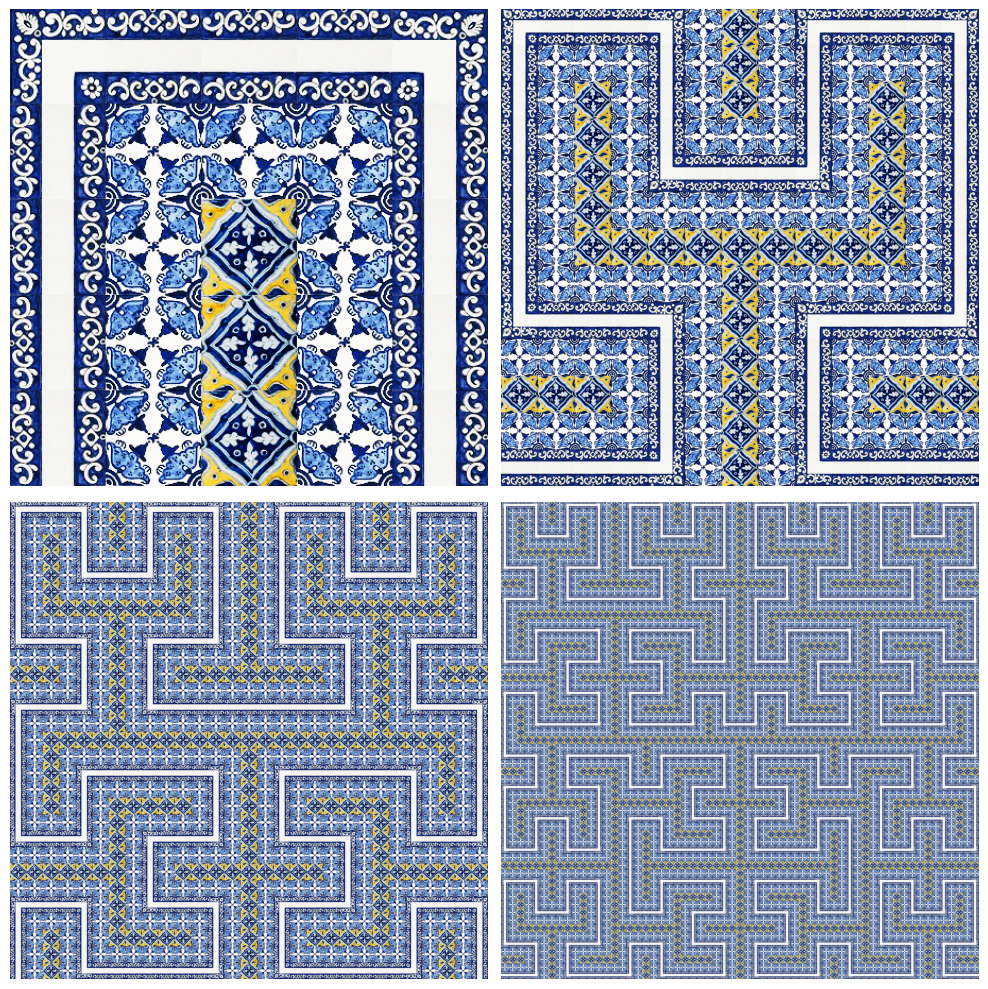

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# --- Helper Functions from previous steps ---

def hilbert_curve(order):
    """Generates the coordinates for a Hilbert curve of a given order."""
    if order == 0:
        return np.array([[0, 0]])
    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T
    q2 = prev_path + np.array([0, scale])
    q3 = prev_path + np.array([scale, scale])
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    return np.vstack([q1, q2, q3, q4])

def load_and_resize_tiles(tiles_directory="tiles"):
    """Loads tile images from a directory, resizes all tiles to a uniform size."""
    tile_names = ["center_tile", "corner_tile", "filler_tile", "straight_tile"]
    loaded_images = {}
    min_dimension = float('inf')
    for name in tile_names:
        file_path = os.path.join(tiles_directory, f"{name}.tif")
        try:
            img = Image.open(file_path)
            loaded_images[name] = img
            width, height = img.size
            min_dimension = min(min_dimension, width, height)
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found.")
            return None
    resized_images = {}
    for name, img in loaded_images.items():
        resized_img = img.resize((min_dimension, min_dimension), Image.Resampling.LANCZOS)
        resized_images[name] = resized_img
    print(f"All images loaded and resized to {min_dimension}x{min_dimension} pixels.")
    return resized_images

def standardize_tiles(tile_images, straight_tile_orientation, corner_tile_orientation):
    """Rotates the straight and corner tiles to a standardized orientation."""
    straight_rotations = {'vertical': -90, 'horizontal': 0}
    corner_rotations = {'bottom-right': -90, 'top-left': 90, 'top-right': 180, 'bottom-left': 0}
    standardized = tile_images.copy()
    straight_angle = straight_rotations.get(straight_tile_orientation.lower(), 0)
    standardized['straight_tile'] = standardized['straight_tile'].rotate(straight_angle, expand=False)
    corner_angle = corner_rotations.get(corner_tile_orientation.lower(), 0)
    standardized['corner_tile'] = standardized['corner_tile'].rotate(corner_angle, expand=False)
    return standardized

def generate_tiled_grid_with_orientation(order):
    """
    Generates an enriched grid where integer values also encode tile orientation.
    """
    path = hilbert_curve(order)
    grid_size = 2**order
    scale_factor = 4
    hires_grid_size = grid_size * scale_factor
    grid = np.zeros((hires_grid_size, hires_grid_size), dtype=int)
    tiled_path = []

    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        dx, dy = x2 - x1, y2 - y1
        for j in range(scale_factor):
            px = x1 + (j * dx) / scale_factor
            py = y1 + (j * dy) / scale_factor
            tiled_path.append([px, py])
    tiled_path.append(path[-1])

    for i, (x, y) in enumerate(tiled_path):
        x_int, y_int = int(x * scale_factor), int(y * scale_factor)

        if 0 < i < len(tiled_path) - 1:
            prev_x, prev_y = tiled_path[i-1]
            next_x, next_y = tiled_path[i+1]
            
            if prev_x == next_x or prev_y == next_y:
                if prev_y == next_y:
                    tile_code = 2 # Horizontal straight
                else:
                    tile_code = 3 # Vertical straight
            else:
                if (prev_x > x and next_y > y) or (prev_y > y and next_x > x):
                    tile_code = 4 # └ (bottom-left)
                elif (prev_x < x and next_y > y) or (prev_y > y and next_x < x):
                    tile_code = 5 # ┘ (bottom-right)
                elif (prev_x > x and next_y < y) or (prev_y < y and next_x > x):
                    tile_code = 6 # ┌ (top-left)
                else:
                    tile_code = 7 # ┐ (top-right)
        
        elif i == 0:
            if tiled_path[i][0] == tiled_path[i+1][0]:
                tile_code = 3
            else:
                tile_code = 2
        elif i == len(tiled_path) - 1:
            if tiled_path[i-1][0] == tiled_path[i][0]:
                tile_code = 3
            else:
                tile_code = 2
        
        if 0 <= x_int < hires_grid_size and 0 <= y_int < hires_grid_size:
            grid[y_int, x_int] = tile_code
        
        for filler_x in range(max(0, x_int - 1), min(hires_grid_size, x_int + 2)):
            for filler_y in range(max(0, y_int - 1), min(hires_grid_size, y_int + 2)):
                if grid[filler_y, filler_x] == 0:
                    grid[filler_y, filler_x] = 1

    return grid


def create_tiled_masterpiece(grid, tile_images):
    """
    Creates a single composite image from the tile grid and images.
    """
    rotations = {
        2: 0,
        3: 90,
        4: 0,
        5: 90,
        6: -90,
        7: 180
    }
    
    tile_size = tile_images['center_tile'].size[0]
    output_size_x = grid.shape[1] * tile_size
    output_size_y = grid.shape[0] * tile_size
    
    composite_image = Image.new('RGB', (output_size_x, output_size_y))

    for y in range(grid.shape[0]):
        for x in range(grid.shape[1]):
            tile_code = grid[y, x]
            
            if tile_code == 0:
                img_to_paste = tile_images['center_tile']
            elif tile_code == 1:
                img_to_paste = tile_images['filler_tile']
            elif tile_code in [2, 3]:
                img_to_paste = tile_images['straight_tile'].rotate(rotations.get(tile_code, 0), expand=False)
            else:
                img_to_paste = tile_images['corner_tile'].rotate(rotations.get(tile_code, 0), expand=False)

            paste_x = x * tile_size
            paste_y = (grid.shape[0] - 1 - y) * tile_size
            composite_image.paste(img_to_paste, (paste_x, paste_y))
            
    return composite_image

# --- The Main Execution Block for Subplots ---

if __name__ == "__main__":
    tile_images = load_and_resize_tiles(tiles_directory="tiles")
    if not tile_images:
        exit()
    standardized_tiles = standardize_tiles(tile_images, 'vertical', 'bottom-right')

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(1, 5):
        ax = axes[i-1]
        tiled_grid = generate_tiled_grid_with_orientation(i)
        tiled_grid = tiled_grid[:-3, :-3]
        final_image = create_tiled_masterpiece(tiled_grid, standardized_tiles)
        ax.imshow(final_image)
        ax.axis('off')

    #plt.suptitle("Hilbert Curve Tiling: Orders 1-4", fontsize=16)
    plt.tight_layout()
    plt.savefig("hilbert_subplots.png")
    print("Saved hilbert_subplots.png")

---
### **Step 2: Creating an Animated GIF**
Beyond a static image, a GIF provides a dynamic way to show the curve's growth. The code generates each order's image and then compiles them into a single, looping animation. This process transforms our series of images into a captivating animation that visually demonstrates the intricate, space-filling nature of the Hilbert curve.

### **Paso 2: Crear un GIF Animado**
Más allá de una imagen estática, un GIF ofrece una forma dinámica de mostrar el crecimiento de la curva. El código genera la imagen de cada orden y luego las compila en una única animación en bucle. Este proceso transforma nuestra serie de imágenes en una animación cautivadora que demuestra visualmente la naturaleza intrincada y de llenado de espacio de la curva de Hilbert.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# --- Helper Functions (same as previous response, not repeated here) ---

def hilbert_curve(order):
    """Generates the coordinates for a Hilbert curve of a given order."""
    if order == 0:
        return np.array([[0, 0]])
    prev_path = hilbert_curve(order - 1)
    scale = 2**(order - 1)
    q1 = np.vstack([prev_path[:, 1], prev_path[:, 0]]).T
    q2 = prev_path + np.array([0, scale])
    q3 = prev_path + np.array([scale, scale])
    q4 = np.vstack([2 * scale - 1 - prev_path[:, 1], scale - 1 - prev_path[:, 0]]).T
    return np.vstack([q1, q2, q3, q4])

def load_and_resize_tiles(tiles_directory="tiles"):
    """Loads tile images from a directory, resizes all tiles to a uniform size."""
    tile_names = ["center_tile", "corner_tile", "filler_tile", "straight_tile"]
    loaded_images = {}
    min_dimension = float('inf')
    for name in tile_names:
        file_path = os.path.join(tiles_directory, f"{name}.tif")
        try:
            img = Image.open(file_path)
            loaded_images[name] = img
            width, height = img.size
            min_dimension = min(min_dimension, width, height)
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found.")
            return None
    resized_images = {}
    for name, img in loaded_images.items():
        resized_img = img.resize((min_dimension, min_dimension), Image.Resampling.LANCZOS)
        resized_images[name] = resized_img
    print(f"All images loaded and resized to {min_dimension}x{min_dimension} pixels.")
    return resized_images

def standardize_tiles(tile_images, straight_tile_orientation, corner_tile_orientation):
    """Rotates the straight and corner tiles to a standardized orientation."""
    straight_rotations = {'vertical': -90, 'horizontal': 0}
    corner_rotations = {'bottom-right': -90, 'top-left': 90, 'top-right': 180, 'bottom-left': 0}
    standardized = tile_images.copy()
    straight_angle = straight_rotations.get(straight_tile_orientation.lower(), 0)
    standardized['straight_tile'] = standardized['straight_tile'].rotate(straight_angle, expand=False)
    corner_angle = corner_rotations.get(corner_tile_orientation.lower(), 0)
    standardized['corner_tile'] = standardized['corner_tile'].rotate(corner_angle, expand=False)
    return standardized

def generate_tiled_grid_with_orientation(order):
    """
    Generates an enriched grid where integer values also encode tile orientation.
    """
    path = hilbert_curve(order)
    grid_size = 2**order
    scale_factor = 4
    hires_grid_size = grid_size * scale_factor
    grid = np.zeros((hires_grid_size, hires_grid_size), dtype=int)
    tiled_path = []

    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        dx, dy = x2 - x1, y2 - y1
        for j in range(scale_factor):
            px = x1 + (j * dx) / scale_factor
            py = y1 + (j * dy) / scale_factor
            tiled_path.append([px, py])
    tiled_path.append(path[-1])

    for i, (x, y) in enumerate(tiled_path):
        x_int, y_int = int(x * scale_factor), int(y * scale_factor)

        if 0 < i < len(tiled_path) - 1:
            prev_x, prev_y = tiled_path[i-1]
            next_x, next_y = tiled_path[i+1]
            
            if prev_x == next_x or prev_y == next_y:
                if prev_y == next_y:
                    tile_code = 2 # Horizontal straight
                else:
                    tile_code = 3 # Vertical straight
            else:
                if (prev_x > x and next_y > y) or (prev_y > y and next_x > x):
                    tile_code = 4 # └ (bottom-left)
                elif (prev_x < x and next_y > y) or (prev_y > y and next_x < x):
                    tile_code = 5 # ┘ (bottom-right)
                elif (prev_x > x and next_y < y) or (prev_y < y and next_x > x):
                    tile_code = 6 # ┌ (top-left)
                else:
                    tile_code = 7 # ┐ (top-right)
        
        elif i == 0:
            if tiled_path[i][0] == tiled_path[i+1][0]:
                tile_code = 3
            else:
                tile_code = 2
        elif i == len(tiled_path) - 1:
            if tiled_path[i-1][0] == tiled_path[i][0]:
                tile_code = 3
            else:
                tile_code = 2
        
        if 0 <= x_int < hires_grid_size and 0 <= y_int < hires_grid_size:
            grid[y_int, x_int] = tile_code
        
        for filler_x in range(max(0, x_int - 1), min(hires_grid_size, x_int + 2)):
            for filler_y in range(max(0, y_int - 1), min(hires_grid_size, y_int + 2)):
                if grid[filler_y, filler_x] == 0:
                    grid[filler_y, filler_x] = 1

    return grid


def create_tiled_masterpiece(grid, tile_images):
    """
    Creates a single composite image from the tile grid and images.
    """
    rotations = {
        2: 0,
        3: 90,
        4: 0,
        5: 90,
        6: -90,
        7: 180
    }
    
    tile_size = tile_images['center_tile'].size[0]
    output_size_x = grid.shape[1] * tile_size
    output_size_y = grid.shape[0] * tile_size
    
    composite_image = Image.new('RGB', (output_size_x, output_size_y))

    for y in range(grid.shape[0]):
        for x in range(grid.shape[1]):
            tile_code = grid[y, x]
            
            if tile_code == 0:
                img_to_paste = tile_images['center_tile']
            elif tile_code == 1:
                img_to_paste = tile_images['filler_tile']
            elif tile_code in [2, 3]:
                img_to_paste = tile_images['straight_tile'].rotate(rotations.get(tile_code, 0), expand=False)
            else:
                img_to_paste = tile_images['corner_tile'].rotate(rotations.get(tile_code, 0), expand=False)

            paste_x = x * tile_size
            paste_y = (grid.shape[0] - 1 - y) * tile_size
            composite_image.paste(img_to_paste, (paste_x, paste_y))
            
    return composite_image


# --- The Main Execution Block for GIF ---

if __name__ == "__main__":
    tile_images = load_and_resize_tiles(tiles_directory="tiles")
    if not tile_images:
        exit()
    standardized_tiles = standardize_tiles(tile_images, 'vertical', 'bottom-right')

    frames = []
    
    # Generate images for orders 1-4
    for order in range(1, 5):
        tiled_grid = generate_tiled_grid_with_orientation(order)
        tiled_grid = tiled_grid[:-3, :-3]
        final_image = create_tiled_masterpiece(tiled_grid, standardized_tiles)
        frames.append(final_image)

    # Downscale all frames to a smaller, consistent size
    target_size = 256
    resized_frames = []
    for frame in frames:
        resized_frame = frame.resize((target_size, target_size), Image.Resampling.LANCZOS)
        resized_frames.append(resized_frame)

    # Save the frames as a GIF with optimization
    resized_frames[0].save(
        "hilbert_animation.gif",
        save_all=True,
        append_images=resized_frames[1:],
        duration=1000,
        loop=0,
        optimize=True
    )
    print("Saved hilbert_animation.gif")

All images loaded and resized to 90x90 pixels.
Saved hilbert_animation.gif


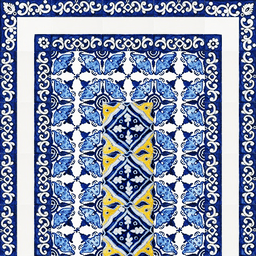